## Generate augmented images from a single image using the ImageDataGenerator
    * Augmented images through Keras_ImageDataGenerator

* ImageDataGenerator object in Keras, which is used for image data augmentation.
* ImageDataGenerator: This class from Keras provides a powerful way to augment images during training. Augmentation techniques help to increase the diversity of the training data, preventing overfitting and improving the model's generalization ability.
* Augmentation Parameters:
    * rotation_range=40: Randomly rotates images by up to 40 degrees.
    * width_shift_range=0.2: Randomly shifts the image horizontally by up to 20% of the image width.
    * height_shift_range=0.2: Randomly shifts the image vertically by up to 20% of the image height.
    * shear_range=0.2: Applies a shearing transformation (tilting) to the image by up to 20 degrees.
    * zoom_range=0.2: Randomly zooms the image in or out by up to 20%.
    * horizontal_flip=True: Randomly flips the image horizontally.
    * fill_mode='nearest': Determines how to fill in newly created pixels when the image is transformed. 'nearest' fills them with the value of the nearest pixel.

In [1]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [2]:
# Loads an image from the specified file path using the load_img function from Keras.
# The image is loaded as a PIL Image object.

img = load_img(r'E:\PYTHONCLASSTF\PrakashSenapati\2024_11_25_Data_Augmentation_Kera_Packages\dog.jpg')

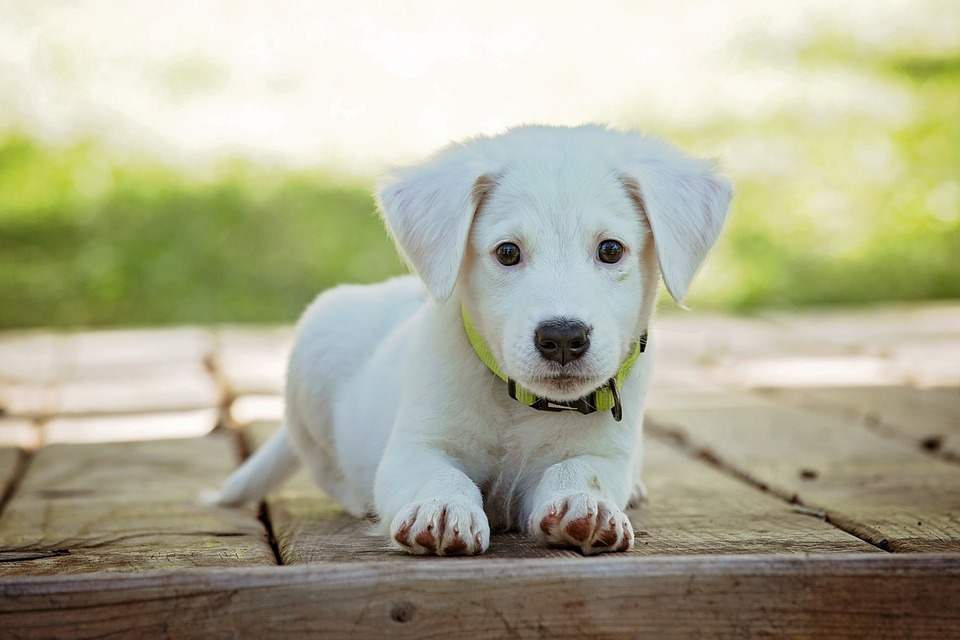

In [3]:
img

In [4]:
# converts the PIL Image object into a NumPy array.
# The resulting array has the shape (height, width, channels) for a color image.

x = img_to_array(img)

In [5]:
x.shape

(640, 960, 3)

In [6]:
x[0]

array([[239., 236., 219.],
       [240., 237., 220.],
       [242., 239., 222.],
       ...,
       [230., 226., 197.],
       [230., 226., 197.],
       [229., 225., 196.]], dtype=float32)

In [7]:
# Adds a dimension at the beginning for the batch size to the NumPy array x, indicating that there is a single image in the batch.
# Keras expects input data to be in the form of batches
# Many deep learning operations are optimized for batch processing.
# Adding a batch dimension allows you to leverage these optimizations, even when working with a single image.

x = x.reshape((1,) + x.shape)

In [8]:
x.shape

(1, 640, 960, 3)

In [9]:
x[0]

array([[[239., 236., 219.],
        [240., 237., 220.],
        [242., 239., 222.],
        ...,
        [230., 226., 197.],
        [230., 226., 197.],
        [229., 225., 196.]],

       [[239., 236., 219.],
        [240., 237., 220.],
        [241., 238., 221.],
        ...,
        [229., 225., 196.],
        [229., 225., 196.],
        [229., 225., 196.]],

       [[239., 236., 219.],
        [239., 236., 219.],
        [239., 236., 219.],
        ...,
        [227., 223., 194.],
        [228., 225., 194.],
        [228., 225., 194.]],

       ...,

       [[ 55.,  35.,  26.],
        [ 57.,  37.,  28.],
        [ 59.,  39.,  30.],
        ...,
        [ 54.,  31.,  15.],
        [ 55.,  32.,  16.],
        [ 57.,  34.,  18.]],

       [[ 53.,  33.,  24.],
        [ 55.,  35.,  26.],
        [ 59.,  36.,  28.],
        ...,
        [ 54.,  32.,  18.],
        [ 54.,  32.,  18.],
        [ 56.,  34.,  20.]],

       [[ 52.,  32.,  23.],
        [ 54.,  34.,  25.],
        [ 58.,  

* Generates 30 augmented versions of the input image using the specified data augmentation techniques (rotation, shifting, shearing, zooming, flipping) and saves them to the specified directory.
    * i = 0: Initializes a counter variable to keep track of the number of augmented images saved.
    * sav_dir: Defines the directory path where the augmented images will be saved.
    * x: The input image data (likely a NumPy array).
    * batch_size=1: Generates one augmented image per iteration.
    * save_to_dir: Specifies the directory where the augmented images will be saved.
    * save_prefix='dog': Sets the prefix for the saved image filenames (e.g., 'dog_0.jpg', 'dog_1.jpg').
    * save_format='jpg': Specifies the format for the saved images (JPEG).

In [12]:
i = 0
sav_dir = r'E:\PYTHONCLASSTF\PrakashSenapati\2024_11_25_Data_Augmentation_Kera_Packages\Data_Augmentation'

for batch in datagen.flow(x, batch_size=1, save_to_dir=sav_dir, save_prefix='dog', save_format='jpg'):
    i += 1
    if i > 29:
        break